<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [HANDLING WITH OUTLIERS](#1)
* [CATCHING & DETECTING OUTLIERS](#2)
* [REMOVING THE OUTLIERS](#3)    
* [LIMITATION & TRANSFORMATION OF THE OUTLIERS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns # matplotlibin metodlarini kullanir
import matplotlib.pyplot as plt

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### What is Outlier? [Source](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.)

In general, <b>``Outliers``</b> are **unusual values** in your dataset, and they can **distort statistical analyses and violate their assumptions**. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are.

### Most common causes of outliers on a data set [Source](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561):

- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data) 

### Guideline for Handling Outliers [Source 01](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.) & [Source 02](https://www.researchgate.net/publication/258174106_Best-Practice_Recommendations_for_Defining_Identifying_and_Handling_Outliers)

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Catching and Detecting Outliers</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [5]:
df = sns.load_dataset("diamonds")

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df.select_dtypes(include ="number") # sadece sayi olanlari verir

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


**info about dataset**
- **carat   :**Carat weight of the diamond
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

### Detecting Outliers with Graphs

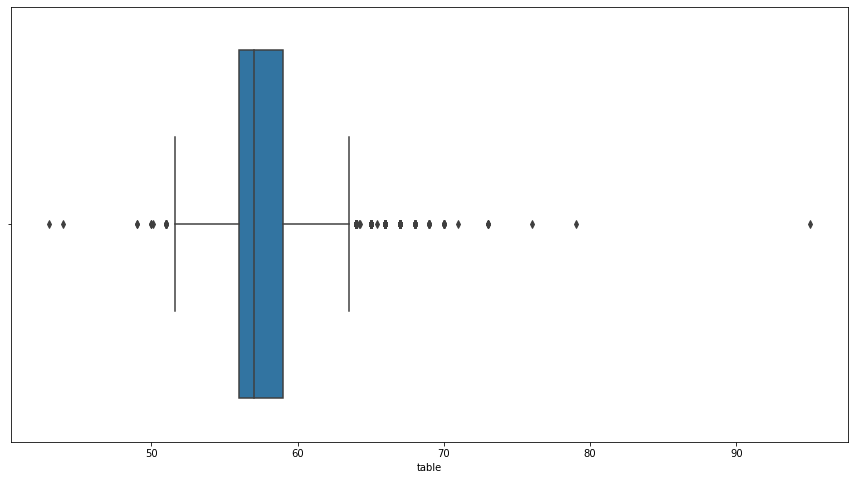

In [12]:
plt.figure(figsize = (15,8))
sns.boxplot(x= df.table);

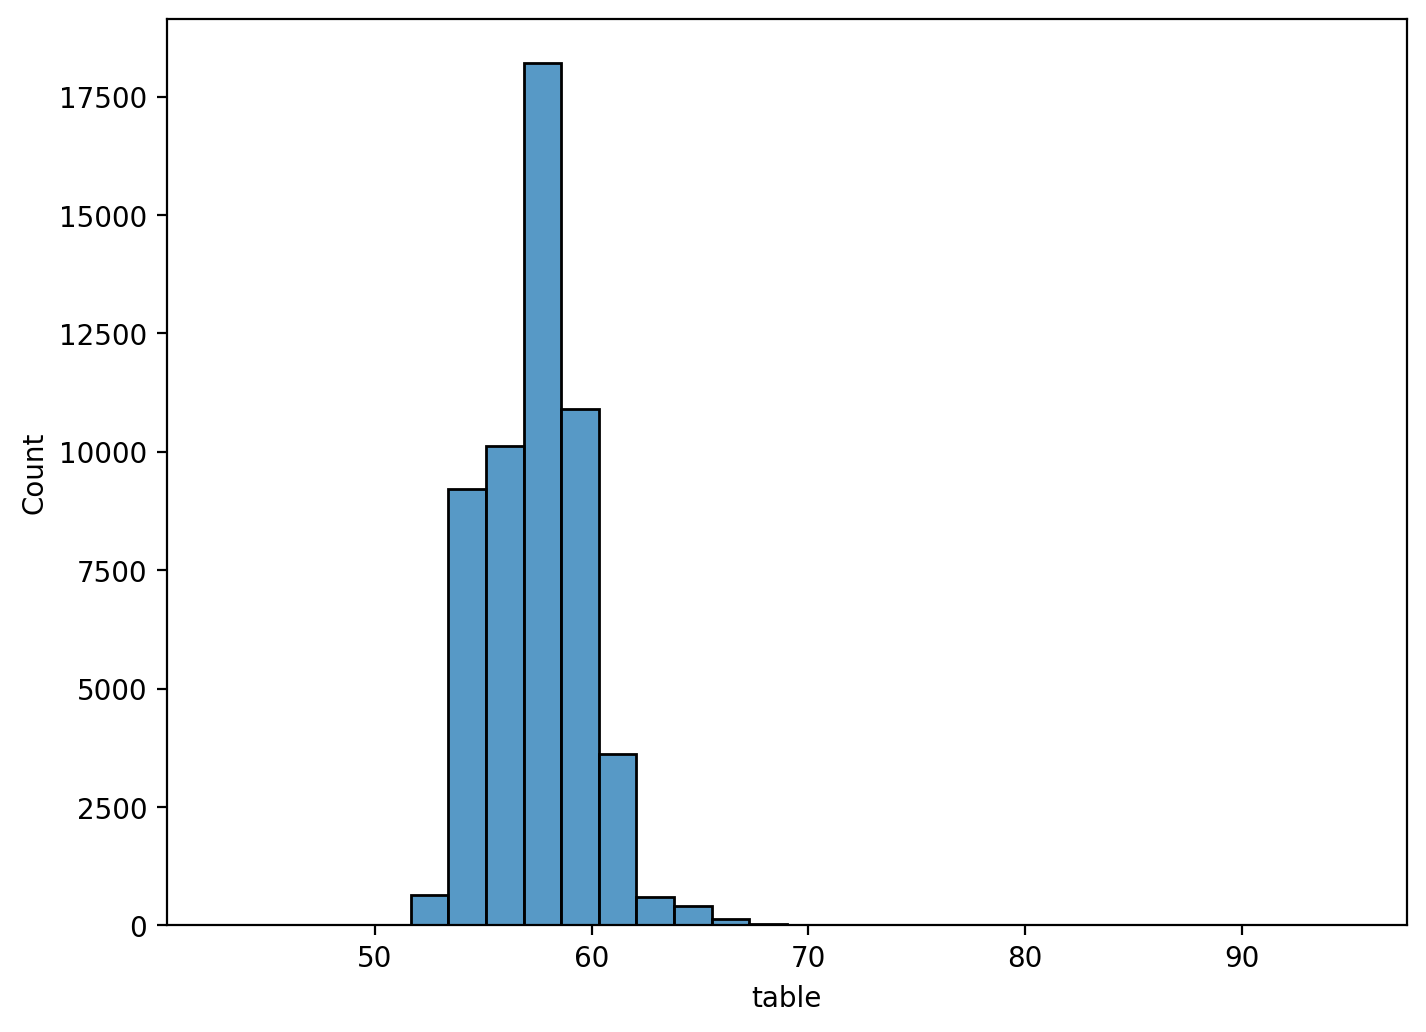

In [17]:
plt.figure(figsize = (8,6),dpi = 200)
sns.histplot(df.table, bins = 30, kde = False);

In [18]:
df.table.sort_values()

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [20]:
df.table.sort_values().tail(10)

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [22]:
tail_index = df.table.sort_values().tail(10).index
tail_index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [23]:
df.loc[tail_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
23067,1.51,Fair,E,SI1,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,Fair,I,VS2,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,Fair,G,SI1,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,Fair,D,VS2,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


### Detecting Outliers with Tukey's Fences | Tukey's Rule

**- First way** of specifying **``Q1 & Q3``** is using the **``.quantile()``** method

In [35]:
from scipy import stats
IQR = stats.iqr(df.table)
IQR

3.0

In [26]:
Q1 = df.table.quantile(0.25) # percentile

In [27]:
Q3 = df.table.quantile(0.75)

In [29]:
IQR = Q3 - Q1
IQR 

3.0

In [30]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

**- Second way** of specifying **``Q1 & Q3``** is using the **``.describe()``** method

In [31]:
Q1 = df.table.describe().loc["25%"] # diger metod...
Q3 = df.table.describe().loc["75%"]
IQR = Q3 - Q1
IQR

3.0

In [39]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim, lower_upper

(51.5, 63.5)

In [34]:
(df.table < lower_lim).sum()

16

In [40]:
(df.table > upper_lim).sum()

589

In [42]:
((df.table < lower_lim) | (df.table > upper_lim)).sum()

605

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Removing the Outliers</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [48]:
drop_index = df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index
drop_index
# outlier indexleri

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [45]:
df.loc[~((df.table < lower_lim) | (df.table > upper_lim))].index 

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            53930, 53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938,
            53939],
           dtype='int64', length=53335)

In [46]:
df.loc[~((df.table < lower_lim) | (df.table > upper_lim))] # atilmis olan df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [47]:
df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))]
df_cleaned # 1 inci yöntemm

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
df.drop(drop_index, axis = 0) # ikinci yöntem
#ya da > < yazarak terstende direkt ulasırız...df.loc[((df.table > lower_lim) | (df.table <upper_lim))]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


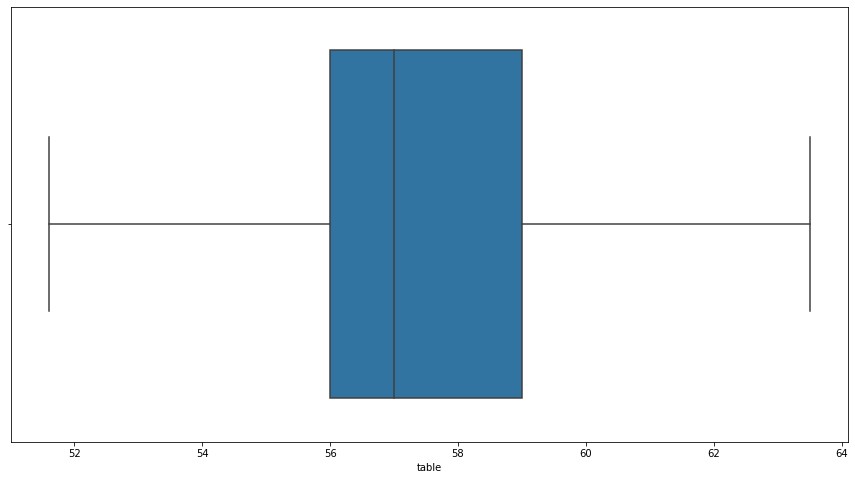

In [51]:
plt.figure(figsize = (15,8))
sns.boxplot(x = df_cleaned.table);

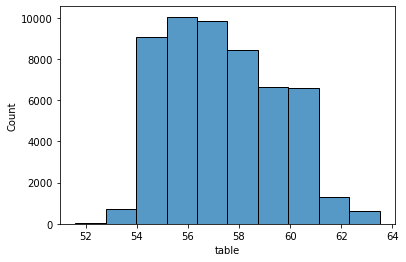

In [52]:
sns.histplot(df_cleaned.table, bins = 10, kde = False) ;

In [53]:
df_cleaned.table.describe() # table sütun ismi

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [54]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [60]:
compare = pd.DataFrame(df.table.describe().values, index = df.table.describe().index, columns = ["first"])
compare["second"] = df_cleaned.table.describe().values
compare

,first,second
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Limitation & Transformation of the Outliers</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively [Source 01](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0) & [Source 02](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html).

##Cautions on Winsorizing Data
Here are a few things to keep in mind when deciding to winsorize data:
1. If there aren’t extreme outliers, then winsorizing the data will only modify the smallest and largest values slightly. This is generally not a good idea since it means we’re just modifying data values for the sake of modifications.
2. Outliers can represent interesting edge cases in the data. Thus, before modifying outliers it’s a good idea to take a closer look at them to see what could have caused them.
3. You should decide whether or not to winsorize data after collecting the data, not before. You should see if there actually are extreme outliers before you decide to perform winsorization. If no extreme outliers are present, winsorization may be unnecessary.##

In [62]:
from scipy.stats.mstats import winsorize

In [63]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [64]:
winsorize(df.table, (0.02, 0.05)) # wins den sonra degerlerimiz asagida 
# bas tan %2 lik kismi whiskere sondan %5 lik kismi whiskere getir dedik

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [65]:
a = len(df.table[df.table<lower_lim]/len(df)) # olmadi bu yeniden bak
a

16

In [66]:
pd.DataFrame([df.table.describe(), df_cleaned.table.describe()], index=['first', 'clean']).T

,first,clean
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [67]:
a = len(df.table[df.table<lower_lim])/len(df)
a

0.00029662588060808305

In [68]:
b = len(df.table[df.table>upper_lim])/len(df)
b

0.010919540229885057

In [69]:
table_win = winsorize(df.table, (a, b))
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


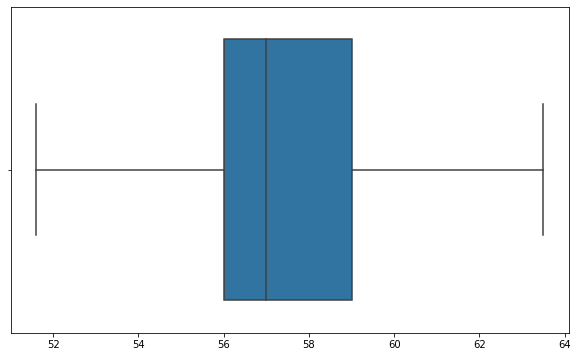

In [70]:
plt.figure(figsize = (10,6))
sns.boxplot(table_win);

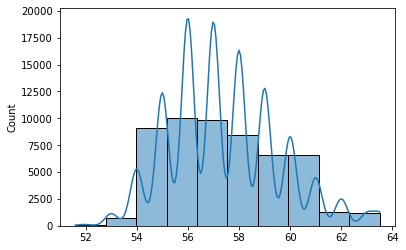

In [74]:
sns.histplot(table_win, bins = 10, kde = False);

In [73]:
table_win_ser = pd.Series(table_win)
table_win_ser

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [75]:
pd.DataFrame([df.table.describe(), table_win_ser.describe()], index=['first', 'clean']).T

,first,clean
count,53940.000000,53940.000000
mean,57.457184,57.438591
std,2.234491,2.161059
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [76]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [77]:
table_win_ser.sort_values().head(20)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

## Transformation using ``log()`` method

The **``Numpy.log()``** method lets you calculate the mathematical log of any number or array. The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e [Source 01](https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.) & [Source 02](https://numpy.org/doc/stable/reference/generated/numpy.log.html).

In [78]:
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

<AxesSubplot:xlabel='carat'>

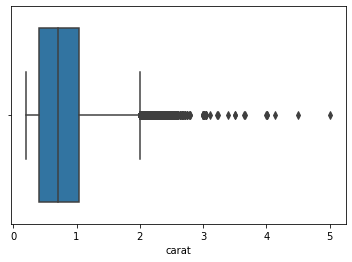

In [79]:
sns.boxplot(x= df.carat)

In [ ]:
plt.figure()

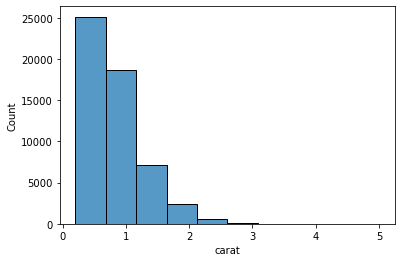

In [81]:
sns.histplot(df.carat, bins = 10, kde= False);

In [84]:
carat_log = np.log(df.carat)
carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

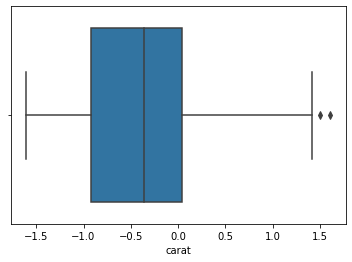

In [86]:
sns.boxplot(x = carat_log);

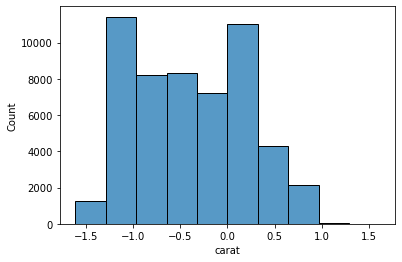

In [87]:
sns.histplot(carat_log, bins = 10, kde = False);

In [90]:
df["carat_log"] = np.log(df.carat)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


## Removing outliers after log() transformation

**first method to drop outliers**

In [92]:
df.carat_log.sort_values().tail(2)

27630    1.504077
27415    1.611436
Name: carat_log, dtype: float64

In [94]:
drop_index = df.carat_log.sort_values().tail(2).index
drop_index

Int64Index([27630, 27415], dtype='int64')

In [95]:
df.drop(drop_index, axis = 0)

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


**second method to drop outliers**

**third method to drop outliers**

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 08</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

____